# London Bike Sharing (Part 2)

# Regression Analysis and Model Development

**The London Bike Sharing Dataset contains 17414 rows, is a comprehensive collection of data related to the bike-sharing system in London, United Kingdom. It provides valuable insights into the usage patterns, trends, and dynamics of the bike-sharing service, offering an opportunity to explore and analyze various aspects of urban transportation.**

*This dataset contains the hourly count of rental bikes between years 2015 and 2017 with the corresponding weather and seasonal information. Performed Exploratory data analysis on **'London Bikes Sharing (part 1)'** to build a prediction model for the hourly utilization “count” of this data set.*

**Regression stands out as the preferred choice for predictive modeling due to its alignment with the dataset's characteristics, interpretability, and proven performance evaluation methods. Its utilization lays a strong groundwork for comprehending and forecasting bike rental counts.**

- **Continuous Target Variable:** Regression is chosen because the target variable, "count" (bike rental count), is continuous, making it suitable for predicting numerical outcomes.
- **Correlation with Predictors:** The dataset includes various features like weather conditions, time of day, and season, which are likely to influence bike rental counts. Regression captures the relationships between these predictors and the target variable.
- **Interpretability:** Regression models offer interpretability, allowing us to understand how different factors affect bike rentals, making it useful for stakeholders.
- **Baseline Model:** Regression serves as a foundational baseline model for predictive tasks before exploring more complex techniques.
- **Regression Performance Metrics:** Regression models have well-established performance metrics, such as Mean Squared Error (MSE) and R-squared (R2), for effective model evaluation

In [2]:
#Import necessary libraries

#for Data Analysis and array processing
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

#For Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm, probplot

#For Statistical modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# read in the csv file as a pandas dataframe
bikes = pd.read_csv("london_bikes_part_2.csv", index_col=None)

In [4]:
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# (Exploratory Data Analysis was performed in Part 1 of these project)
**London Bikes Sharing (Part 1)**

# Feature Engineering

In [6]:
# Define a function to determine if a given hour is typically a rush hour
def is_rush_hour(hour):
    if (7 <= hour <= 9) or (17 <= hour <= 19):
        return 1
    else:
        return 0

# Apply the function to the 'hr' column to create the new 'rush_hour' feature
bikes['rush_hour'] = bikes['hr'].apply(is_rush_hour)

# Display the first few rows of the dataframe to verify the changes
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,rush_hour
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0


In [7]:
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
rush_hour       int64
dtype: object

# Model Development

In [9]:
#creating dimensions for Modelling
x_data = bikes.drop(['cnt', 'dteday', 'season'], axis=1)
y_data = bikes['cnt']

In [10]:
#Spliting test and train data with standard ratio
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=1)
print("shape of x_train",x_train.shape)
print("shape of y_train",y_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_test",y_test.shape)

shape of x_train (13903, 15)
shape of y_train (13903,)
shape of x_test (3476, 15)
shape of y_test (3476,)


In [11]:
#creating object, using which we could generate instances.
lm = LinearRegression() 

In [12]:
#Fitting model by supplying train data
lm.fit(x_train,y_train)

LinearRegression()

In [13]:
yhat= lm.predict(x_test)
print("Predicted cnt for test data are:", yhat[0:5].tolist())

Predicted cnt for test data are: [389.00000000003854, 145.999999999969, 151.99999999996143, 188.0000000000103, 62.00000000003268]


# Model Evaluation

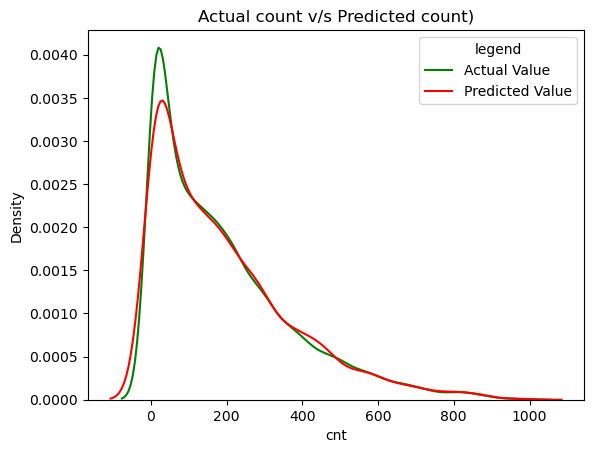

In [14]:
plt.title("Actual count v/s Predicted count)")
ax1 = sns.distplot(y_data,hist=False,color="green",label="Actual Value")
sns.distplot(yhat,hist=False,color='red',label="Fitted Value",ax = ax1)
plt.legend(title='legend', loc='upper right', labels=['Actual Value', 'Predicted Value'])
plt.show()

In [15]:
#Mean Squared Error(MSE)
mse = mean_squared_error(y_test, yhat)
print('The mean square error of cnt and predicted value is: ', mse)

The mean square error of cnt and predicted value is:  7.735109634867101e-22


In terms of MSE, a smaller value typically indicates that the predictions from the model are very close to the actual values. In this case, an MSE this close to zero suggests that the predicted values are nearly identical to the actual 'cnt' values, which is a sign of an extremely accurate model for predicting 'cnt'.

In [16]:
#R-Squared
print('the R-Squared value of fitted model is:',lm.score(x_train,y_train))

the R-Squared value of fitted model is: 1.0


# Conclusions

A perfect R-squared value of 1.0 suggests that the model's predictions exactly match the observed 'cnt' values. However, **a perfect R-squared is quite rare and can sometimes indicate overfitting**, where the model has learned the training data too well and might not generalize well to new, unseen data.

## While a perfect R-squared value is desirable, it's essential to assess the model's performance on unseen data to ensure its predictive capability in real-world scenarios.